In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path= '/gdrive/My Drive/Online ML - MS Aspirants - Sept 2020/Assignments/data/'

In [ ]:
data= pd.read_csv(path + 'titanic_train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data = data.fillna({'Age' : data['Age'].mean(), 'Embarked' : 'Unknown'})

In [ ]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
data = data.drop(columns = ['PassengerId','Name','Ticket', 'Cabin'])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

sex_labelencoder = LabelEncoder()
data["Sex"] = sex_labelencoder.fit_transform(data["Sex"])

embarked_labelencoder = LabelEncoder()
data["Embarked"] = embarked_labelencoder.fit_transform(data["Embarked"])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
data.shape

(891, 8)

In [ ]:
x = data.drop(columns = ['Survived'])
y = data.iloc[:, 1:2]

In [ ]:
x = np.array(x)
y = np.array(y)
y = np.reshape(y,(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 2) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_neighbors=4)

model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_pred)
print('Training Accuracy = {} %'.format(train_accuracy*100))

test_accuracy = accuracy_score(y_test, test_pred)
print('Test Accuracy = {} %'.format(test_accuracy*100))

Training Accuracy = 91.31736526946108 %
Test Accuracy = 83.85650224215246 %


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
prf = precision_recall_fscore_support(y_test, test_pred, average='weighted')
print(" Precision:{}%".format(prf[0]*100))
print("Recall: {}%".format(prf[1]*100))
print("F1 Score: {}%".format(prf[2]*100))

 Precision:86.23024869694088%
Recall: 83.85650224215246%
F1 Score: 84.43504161075019%


[[ 50   4   0]
 [  7  33   3]
 [  5  17 104]]


Text(0.5, 1.0, 'Test F1 Score:84.43504161075019%')

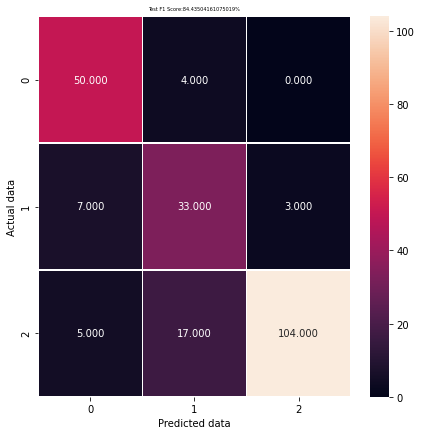

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual data')
plt.xlabel('Predicted data')
all_sample_title = 'Test F1 Score:{}%'.format(prf[2]*100)
plt.title(all_sample_title, size = 5)